<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project08_CO2_Emission/blob/main/CO2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO2 Emission

## Basic Approach

The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression Algorithm
3. Covert data into an array
4. Converting the target variable into linear regression  

Regression Model:
  *   1. Linear Univariate Regression
  *   2. Linear Multivariate Regression

Target Cluster
Datasets is about a set of data regarding CO2 Emission with following Linear Regression

## Split Datasets into Train and Test

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# read the dataset
data_path = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project08_CO2_Emission/main/dataset/FuelConsumption2.csv'
# upload dataset into data frame
df = pd.read_csv(data_path)
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [3]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=3)
df_train.to_csv('train.csv')
df_test.to_csv('test.csv')

## Univariate Linear Regression Approach

In [4]:
# summarize the data
df_train.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,746.0,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,2014.0,3.339812,5.792225,13.252815,9.458043,11.549464,26.589812,255.317694
std,0.0,1.415574,1.809296,4.124385,2.830661,3.514554,7.680576,63.977992
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.100000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.700000,10.900000,26.000000,249.000000
75%,2014.0,4.275000,8.000000,15.550000,10.700000,13.300000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


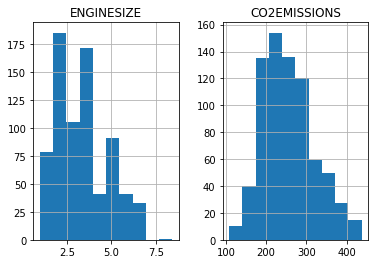

In [5]:
viz = df_train[['ENGINESIZE','CO2EMISSIONS']]
viz.hist()
plt.show()

In [6]:
model1 = LinearRegression()
train_x1 = np.asanyarray(df_train[['ENGINESIZE']])
train_y1 = np.asanyarray(df_train[['CO2EMISSIONS']])
model1.fit(train_x1, train_y1)
# verify with coefficients
print('Coefficients is', model1.coef_[0][0])
print('Intercept is', model1.intercept_[0])

Coefficients is 39.46811191707529
Intercept is 123.5016074512157


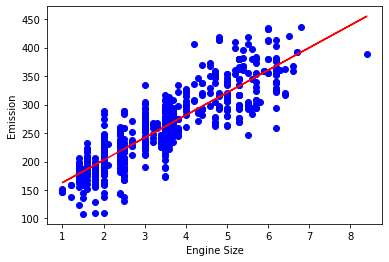

In [7]:
plt.scatter(df_train.ENGINESIZE, df_train.CO2EMISSIONS, color='blue')
plt.plot(train_x1, model1.coef_[0][0]*train_x1 + model1.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

Evaluate Metrics  
1.   Mean Absolute Error(MAE)
2.   Residual Sum of Squares(MSE)
3.   R2 score



In [8]:
# from sklearn.metrics import r2_score
test_x1 = np.asanyarray(df_test[['ENGINESIZE']])
test_y1 = np.asanyarray(df_test[['CO2EMISSIONS']])
y_hat = model1.predict(test_x1)

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y1)))
print('Residual sum of squares(MSE): %.2f' % np.mean((y_hat - test_y1) ** 2))
print('R2-score: %.2f' % r2_score(y_hat, test_y1))

Mean absolute error: 21.90
Residual sum of squares(MSE): 892.50
R2-score: 0.71


## Multivariate Linear Regression

In [9]:
train_x2 = df_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
train_y2 = df_train[['CO2EMISSIONS']]

In [10]:
train_x2.head(3)
# train_y2.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
715,2.5,4,8.8,6.2,7.6
386,3.7,6,20.2,15.3,18.0
105,3.0,6,11.9,8.0,10.1


In [11]:
model2 = LinearRegression()
model2.fit(train_x2, train_y2)
# verify with coefficients
print('Coefficients is', model2.coef_[0])
print('Intercept is', model2.intercept_[0])

Coefficients is [12.39106011  5.75096479 -0.65066428 -3.31646136 13.26237134]
Intercept is 67.44008516130242


In [12]:
test_x2 = df_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
test_y2 = df_test[['CO2EMISSIONS']]
y_hat2 = model2.predict(df_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat2 - test_y2)))
print('Residual sum of squares: %.2f' % np.mean((y_hat2 - test_y2) ** 2))
print('R2-score: %.2f' % r2_score(y_hat2, test_y2))
print('Variance score: %.2f' %model2.score(test_x2, test_y2))

Mean absolute error: 15.92
Residual sum of squares: 511.96
R2-score: 0.85
Variance score: 0.87
